# Modelos de regresión lineal
## Modelo con datos simulados

*   y = a + b*x
* X: 100 valores distribuidos según N(1.5, 2.5) (media, varianza)
* Ye = 5-1.9 * x + e
* e estará distribuido según una N(0, 0.8) (error)




In [0]:
import pandas as pd
import numpy as np

In [0]:
x = 1.5 + 2.5 * np.random.randn(100)

In [0]:
res = 0 + 0.8 * np.random.randn(100)

In [0]:
y_pred = 5 + 1.9 * x

In [0]:
y_act = 5 + 1.9 * x + res

In [0]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [0]:
data = pd.DataFrame(
  {
      "x":x_list,
      "y_actual":y_act_list,
      "y_prediccion":y_pred_list
  }
)

In [57]:
data.head()

,x,y_actual,y_prediccion
0,3.158747,10.411989,11.001619
1,-0.970331,3.069934,3.156372
2,-0.297746,5.164051,4.434282
3,1.025608,7.270554,6.948655
4,0.769950,4.669522,6.462906


In [0]:
import matplotlib.pyplot as plt

In [0]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

Text(0.5, 1.0, 'Valor actual vs predicción')

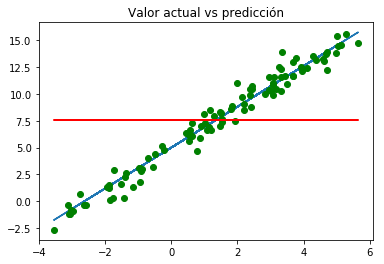

In [60]:
plt.plot(x,y_pred)
plt.plot(x, y_act,"go")
plt.plot(x,y_mean, "r")
plt.title("Valor actual vs predicción")

* SSD Suma de los cuadrados de las diferencias de distancia de un punto observado a la predicción del modelo. También llamado SSE. Es igual a la sumatoria de (Yi - Y gorrito)^2
* SST Suma de los cuadrados totales. Es la distancia del punto observado a la media. Es igual a la sumatoria de (Yi-Y media)^2
* SSR Suma de los cuadrados de la regresión. Es igual a la sumatoria de (Y gorrito - Y media)^2
* SST = SSR + SSD o a la sumatoria de (Yi - Y media)^2

In [0]:
data["SSR"]=(data["y_prediccion"]-np.mean(y_act))**2
data["SSD"]=(data["y_prediccion"]-data["y_actual"])**2
data["SST"]=(data["y_actual"]-np.mean(y_act))**2

In [62]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,3.158747,10.411989,11.001619,11.793600,0.347663,8.091475
1,-0.970331,3.069934,3.156372,19.457499,0.007472,20.227540
2,-0.297746,5.164051,4.434282,9.816664,0.532563,5.776265
3,1.025608,7.270554,6.948655,0.382891,0.103619,0.088139
4,0.769950,4.669522,6.462906,1.219990,3.216225,8.397913


In [0]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [64]:
SSR

2107.5219022029632

In [65]:
SSD

63.1412092174919

In [66]:
SST

2251.5481201676926

In [67]:
SSR+SSD

2170.663111420455

In [0]:
R2 = SSR/SST

In [69]:
R2

0.9360323607234287

(array([ 2.,  0.,  5., 10., 16., 23., 24., 12.,  5.,  3.]),
 array([-2.49963105, -2.04978631, -1.59994157, -1.15009683, -0.7002521 ,
        -0.25040736,  0.19943738,  0.64928212,  1.09912685,  1.54897159,
         1.99881633]),
 <a list of 10 Patch objects>)

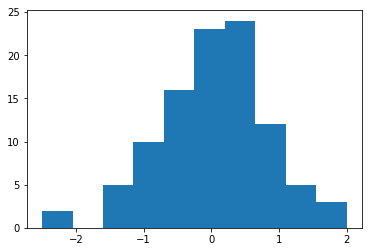

In [70]:
plt.hist(data["y_prediccion"]-data["y_actual"])

## Obteniendo la recta de regresión
* y = a + b *x
* b = sum((xi - x_m)*(y_i-y_m))/sum((xi-x_m)^2)
* a = y_m - b * x_m

In [71]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])
x_mean, y_mean

(1.367541066985009, 7.567437336256026)

In [0]:
data["beta_n"] = (data["x"]-x_mean)*(data["y_actual"]-y_mean)
data["beta_d"] = (data["x"]-x_mean)**2

In [0]:
beta = sum(data["beta_n"])/sum(data["beta_d"])

In [0]:
alpha = y_mean - beta * x_mean

In [75]:
alpha, beta

(4.919128521910444, 1.936547924066555)

El modelo lineal obtenido por regresión es: y=4.961807652799488 + 1.8953776984771151 * x

In [0]:
data["y_model"] = alpha + beta * data["x"]

In [77]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_n,beta_d,y_model
0,3.158747,10.411989,11.001619,11.793600,0.347663,8.091475,5.095177,3.208417,11.036193
1,-0.970331,3.069934,3.156372,19.457499,0.007472,20.227540,10.514587,5.465644,3.040037
2,-0.297746,5.164051,4.434282,9.816664,0.532563,5.776265,4.002329,2.773182,4.342528
3,1.025608,7.270554,6.948655,0.382891,0.103619,0.088139,0.101514,0.116918,6.905267
4,0.769950,4.669522,6.462906,1.219990,3.216225,8.397913,1.731767,0.357115,6.410174


In [0]:
SSR = sum((data["y_model"]-y_mean)**2)
SSD = sum((data["y_model"]-data["y_actual"])**2)
SST = sum((data["y_actual"]-y_mean)**2)

In [79]:
SSR, SSD, SST

(2189.282111855121, 62.26600831257249, 2251.5481201676926)

Text(0.5, 1.0, 'Valor actual vs predicción')

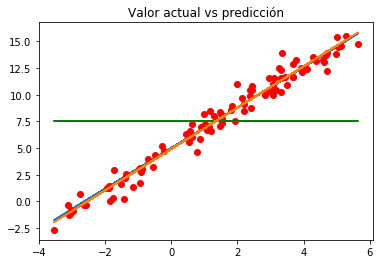

In [80]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]
plt.plot(data["x"],data["y_prediccion"])
plt.plot(data["x"], data["y_actual"], "ro")
plt.plot(data["x"],y_mean,"g")
plt.plot(data["x"], data["y_model"])
plt.title("Valor actual vs predicción")

## Obtención del Error Standard de los Residuales (RSE)

In [83]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

0.7970993863759674

In [84]:
np.mean(data["y_actual"])

7.567437336256026

In [87]:
algo = (RSE/np.mean(data["y_actual"]))*100
print("El porcentaje es: {}%".format(algo))
#Porcentaje de errores de este modelo

El porcentaje es: 10.533280302923933%
